<a href="https://colab.research.google.com/github/Atikahdr/CarPricePrediction/blob/main/CarPriceDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pickle
import os
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
car_data = pd.read_csv("/content/drive/MyDrive/DScience-Project/Car Price/used_car_price_dataset_extended.csv")
car_data

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


In [ ]:
car_data.shape

(10000, 12)

In [ ]:
car_data.describe()

,make_year,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2009.206900,17.960753,2287.130000,3.003500,7179.754532,0.492200
std,8.373858,5.025486,1291.276927,1.418904,2795.270940,0.694109
min,1995.000000,5.000000,800.000000,1.000000,1000.000000,0.000000
25%,2002.000000,14.540000,1200.000000,2.000000,5176.547500,0.000000
50%,2009.000000,17.970000,1800.000000,3.000000,6961.260000,0.000000
75%,2016.000000,21.352500,3000.000000,4.000000,8993.732500,1.000000
max,2023.000000,35.000000,5000.000000,5.000000,17647.630000,5.000000


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [ ]:
# Check percentage of Missing Value
car_data.isnull().sum()/len(car_data)*100

,0
make_year,0.00
mileage_kmpl,0.00
engine_cc,0.00
fuel_type,0.00
owner_count,0.00
price_usd,0.00
brand,0.00
transmission,0.00
color,0.00
service_history,20.38


Handle missing value 'service_history' with mode

In [ ]:
car_data['service_history'] = car_data['service_history'].fillna("No Record")

In [ ]:
car_data.duplicated().sum()

np.int64(0)

In [ ]:
car_data['service_history'].isna().sum()
car_data['service_history'].value_counts()


,count
service_history,
Full,4987
Partial,2975
No Record,2038


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     10000 non-null  object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [ ]:
car_data.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,No Record,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,No Record,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


EDA

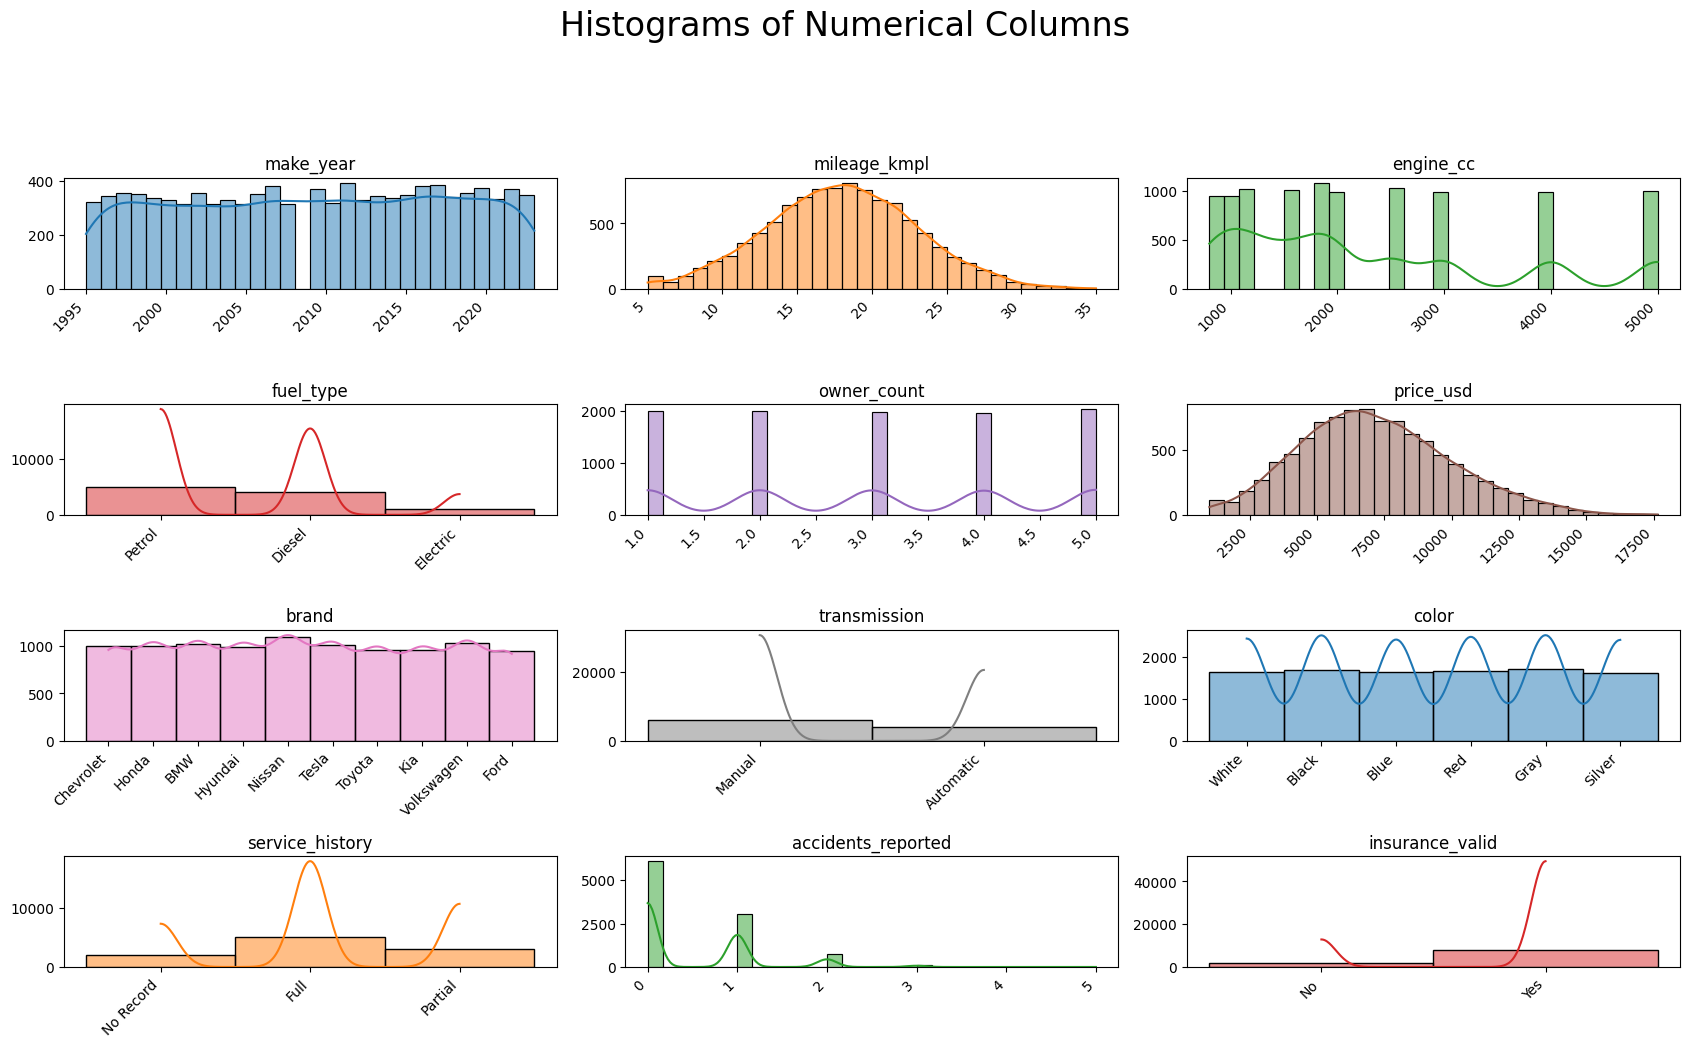

In [ ]:
car_cols = car_data[
      [
          'make_year',
          'mileage_kmpl',
          'engine_cc',
          'fuel_type',
          'owner_count',
          'price_usd',
          'brand',
          'transmission',
          'color',
          'service_history',
          'accidents_reported',
          'insurance_valid'
      ]
]
# Histogram

fig = plt.figure(figsize=(17, 15))
plt.suptitle(
    'Histograms of Numerical Columns\n',
    horizontalalignment="center",
    fontstyle = "normal",
    fontsize = 24,
    fontfamily = "sans-serif"
)

for i, col in enumerate(car_cols.columns):
    plt.subplot(6, 3, i +1)
    sns.histplot(
        data=car_cols,
        x=col,
        kde=True,
        bins=30,
        color=sns.color_palette("tab10")[i % 8]
    )
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

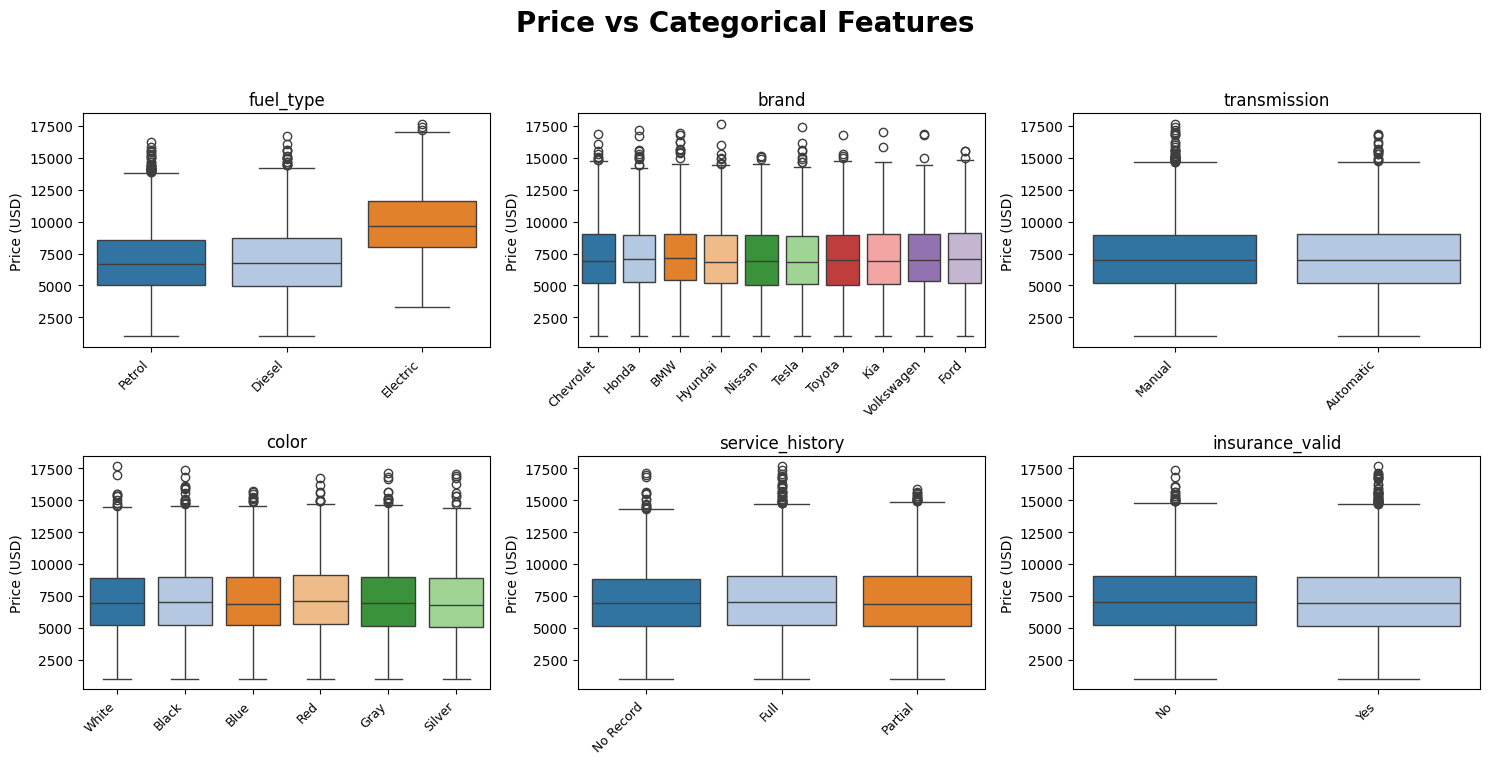

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Price vs Categorical Features', fontsize=20, fontweight='bold')

for i, col in enumerate(cat_cols):
    row = i // 3
    col_pos = i % 3

    # Categorical Columns
    car_data[col] = car_data[col].astype(str)

    sns.boxplot(
        x=col,
        y='price_usd',
        data=car_data,
        ax=axes[row, col_pos],
        palette='tab20'
    )

    axes[row, col_pos].set_title(f'{col}', fontsize=12)
    axes[row, col_pos].set_xlabel('')
    axes[row, col_pos].set_ylabel('Price (USD)')

# Rotation
for ax in axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


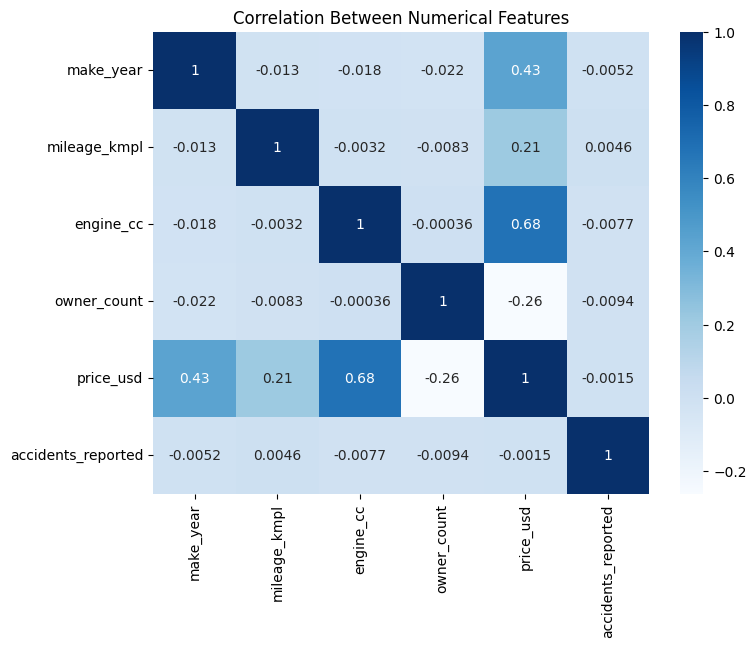

In [ ]:
num_cols = car_cols.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8,6))
sns.heatmap(car_data[num_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()


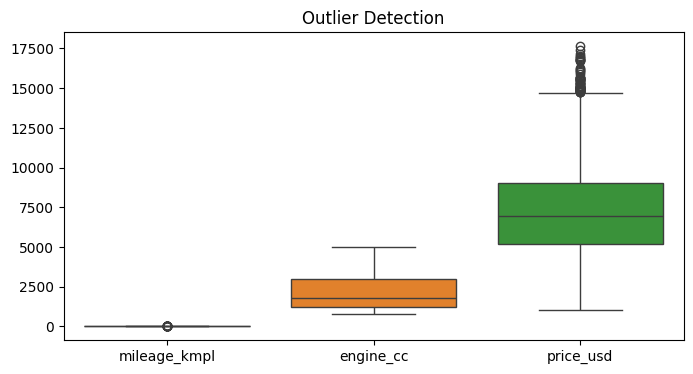

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=car_data[['mileage_kmpl', 'engine_cc', 'price_usd']])
plt.title('Outlier Detection')
plt.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    car_data,
    x='engine_cc',
    y='mileage_kmpl',
    z='price_usd',
    color='brand',
    color_discrete_sequence=px.colors.qualitative.Plotly,
    opacity=0.8,
    title="Car Price 3D Visualization"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Engine CC",
        yaxis_title="Mileage (kmpl)",
        zaxis_title="Price (USD)"
    )
)

fig.show()


## Feature Engineering

In [ ]:
from datetime import datetime
# Calculate car age from this year (2025) to derive a moore relevanr feature
car_data['car_age'] = datetime.now().year - car_data['make_year']

# Drop 'make_year' to prevent multicollinearity with 'car_age' and reduce redundancy
car_data.drop(['make_year'], axis=1, inplace=True)

In [ ]:
car_data.head()

,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,car_age
0,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,No Record,0,No,24
1,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,No Record,0,Yes,11
2,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,2
3,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,16
4,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,20


In [ ]:
car_data.describe()

,mileage_kmpl,engine_cc,owner_count,price_usd,accidents_reported,car_age
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,17.960753,2287.130000,3.003500,7179.754532,0.492200,15.793100
std,5.025486,1291.276927,1.418904,2795.270940,0.694109,8.373858
min,5.000000,800.000000,1.000000,1000.000000,0.000000,2.000000
25%,14.540000,1200.000000,2.000000,5176.547500,0.000000,9.000000
50%,17.970000,1800.000000,3.000000,6961.260000,0.000000,16.000000
75%,21.352500,3000.000000,4.000000,8993.732500,1.000000,23.000000
max,35.000000,5000.000000,5.000000,17647.630000,5.000000,30.000000


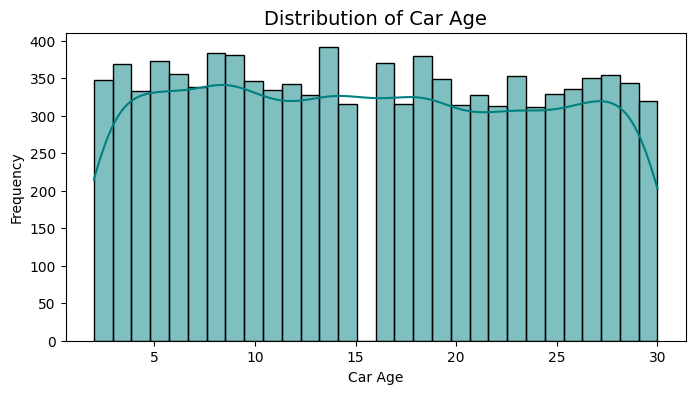

In [ ]:
# Car Age Histogram
plt.figure(figsize=(8, 4))
sns.histplot(car_data['car_age'], bins=30, kde=True, color='teal')
plt.title('Distribution of Car Age', fontsize=14)
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.feature_selection import f_classif
import scipy.stats as stats

cat_cols = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']
anova_results = {}

for col in cat_cols:
  groups = [group["price_usd"].values for name,  group in car_data.groupby(col)]
  f_stat, p_val = stats.f_oneway(*groups)
  anova_results[col] = {"F-Statistic": f_stat, "p-value": p_val}

anova_car = pd.DataFrame(anova_results).T
anova_car.sort_values("p-value", inplace=True)
print(anova_car)

                 F-Statistic        p-value
fuel_type         541.415527  5.620363e-224
color               1.502996   1.851782e-01
service_history     1.334914   2.632276e-01
brand               1.065580   3.847723e-01
insurance_valid     0.503628   4.779271e-01
transmission        0.076750   7.817563e-01


In [ ]:
from scipy.stats import f_oneway

f_oneway(
    car_data.loc[car_data['fuel_type'] == 'Petrol', 'price_usd'],
    car_data.loc[car_data['fuel_type'] == 'Diesel', 'price_usd'],
    car_data.loc[car_data['fuel_type'] == 'Electric', 'price_usd']
)


F_onewayResult(statistic=np.float64(541.4155267145767), pvalue=np.float64(5.620362967108099e-224))

* p-value = 5.62 × 10⁻²²⁴
Nilai ini jauh lebih kecil dari 0.05, artinya kita menolak H₀ (hipotesis nol).
👉 Kesimpulan: Ada perbedaan signifikan harga mobil (price_usd) berdasarkan jenis bahan bakar (fuel_type).


* F-statistic = 541.42 (sangat tinggi)
Ini menunjukkan bahwa variabilitas harga antar jenis bahan bakar jauh lebih besar dibandingkan variabilitas di dalam tiap kelompok.
Dengan kata lain, fuel_type benar-benar memengaruhi harga.

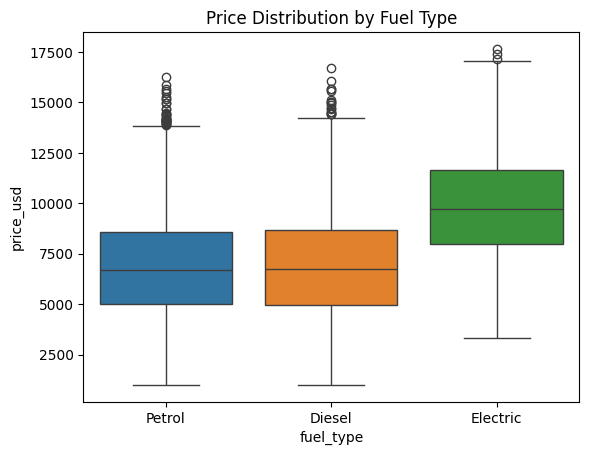

In [ ]:
sns.boxplot(x='fuel_type', y='price_usd', data=car_data, palette='tab10')
plt.title('Price Distribution by Fuel Type')
plt.show()


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=car_data['price_usd'],
                          groups=car_data['fuel_type'],
                          alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1   group2   meandiff  p-adj    lower      upper    reject
----------------------------------------------------------------
  Diesel Electric  2931.7422    0.0  2709.6479  3153.8365   True
  Diesel   Petrol   -27.2466 0.8785   -158.952   104.4587  False
Electric   Petrol -2958.9888    0.0 -3177.1104 -2740.8672   True
----------------------------------------------------------------


🧠 Interpretasi Insight:

✅ Electric car memiliki harga paling tinggi, secara signifikan lebih mahal dibandingkan Diesel dan Petrol.
→ Ini masuk akal karena mobil listrik biasanya punya teknologi lebih baru, efisiensi energi tinggi, dan biaya operasional rendah.

⚙️ Tidak ada perbedaan signifikan antara Diesel dan Petrol.
→ Keduanya punya rentang harga yang mirip — kemungkinan karena keduanya masih konvensional dan tersedia luas di pasar.

Berdasarkan hasil ANOVA dan uji Tukey HSD, fuel_type berpengaruh signifikan terhadap harga mobil.
Mobil Electric memiliki rata-rata harga tertinggi, sedangkan Diesel dan Petrol tidak berbeda signifikan satu sama lain.

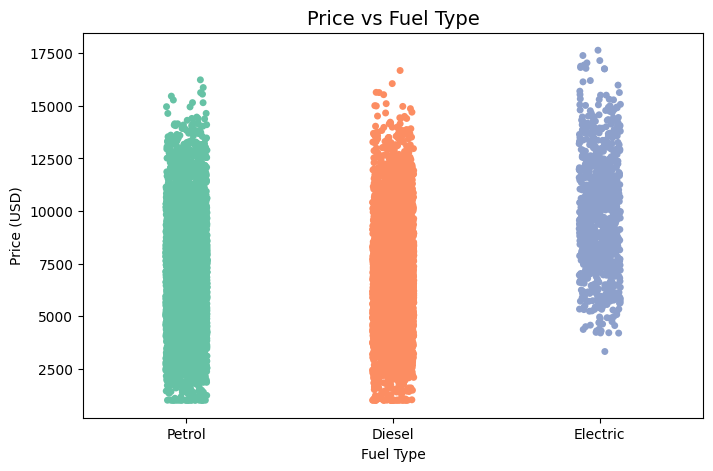

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(x='fuel_type', y='price_usd', data=car_data, jitter=True, palette='Set2')
plt.title('Price vs Fuel Type', fontsize=14)
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.show()


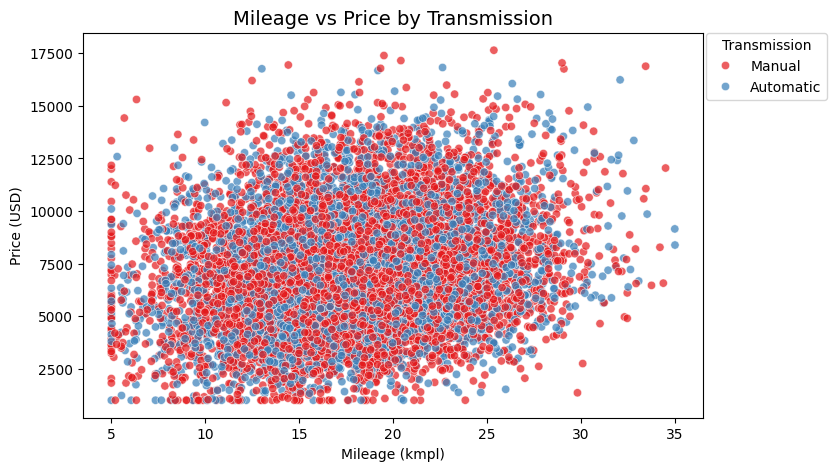

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage_kmpl', y='price_usd', hue='transmission',
                data=car_data, palette='Set1', alpha=0.7)
plt.title('Mileage vs Price by Transmission', fontsize=14)
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (USD)')
plt.legend(title='Transmission', bbox_to_anchor=(1.20, 1), loc='upper right', borderaxespad=0.)
plt.show()


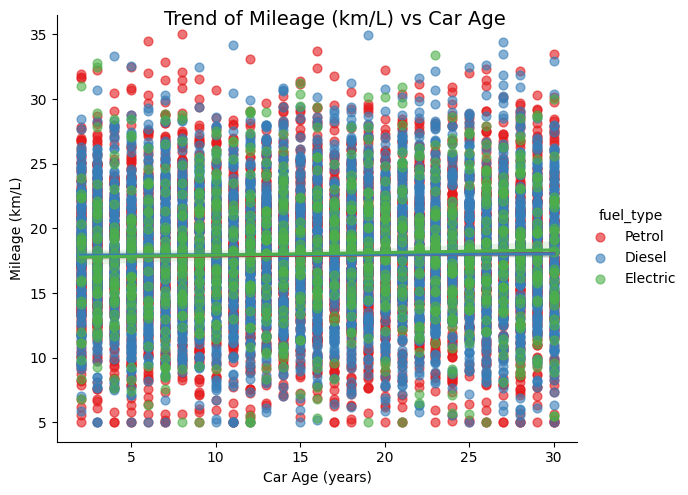

In [ ]:
g = sns.lmplot(
    x='car_age',
    y='mileage_kmpl',
    hue='fuel_type',
    data=car_data,
    palette='Set1',
    height=5, aspect=1.2,
    scatter_kws={'alpha':0.6, 's':40}
)
g.fig.suptitle('Trend of Mileage (km/L) vs Car Age', fontsize=14)
g.set_axis_labels('Car Age (years)', 'Mileage (km/L)')
plt.show()


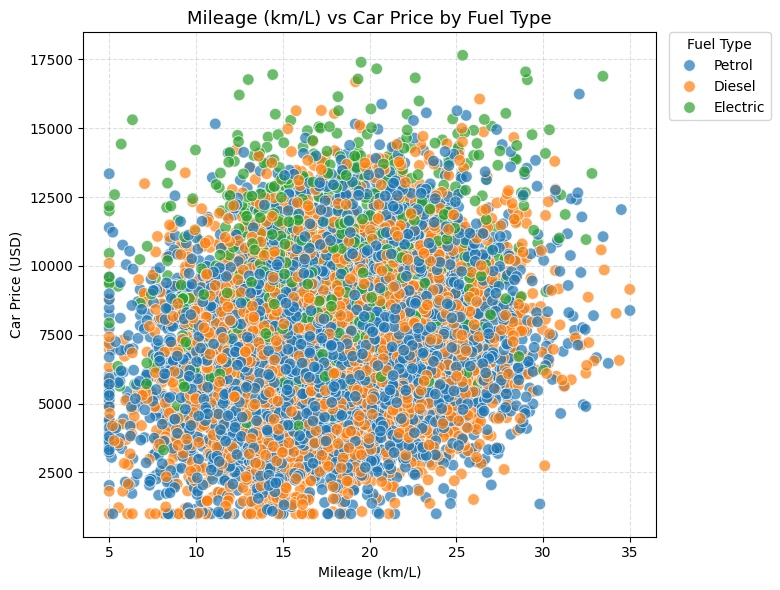

In [ ]:
# Mileage (km/L) VS Car Price (Scatter Plot)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=car_data,
    x='mileage_kmpl',
    y='price_usd',
    hue='fuel_type',
    palette='tab10',
    alpha=0.7,
    s=70
)

plt.title('Mileage (km/L) vs Car Price by Fuel Type', fontsize=13)
plt.xlabel('Mileage (km/L)')
plt.ylabel('Car Price (USD)')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.20, 1), loc='upper right', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


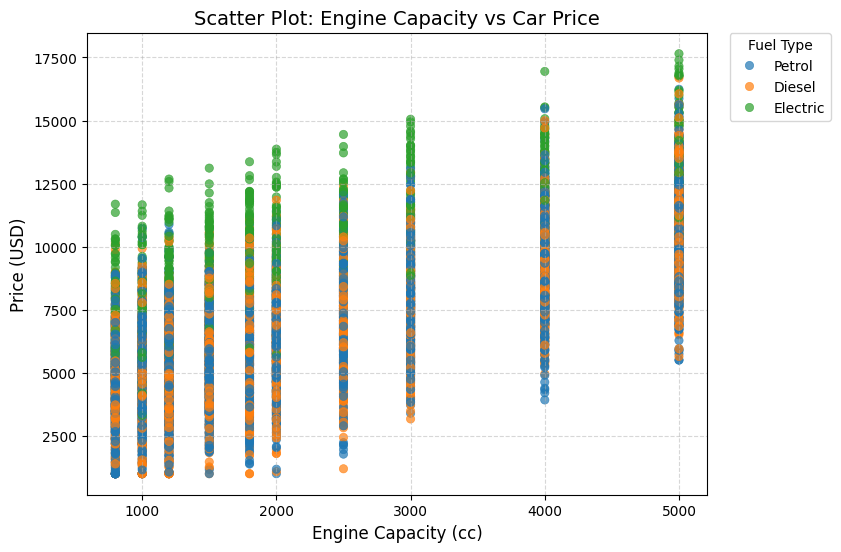

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=car_data,
    x='engine_cc',
    y='price_usd',
    hue='fuel_type',
    palette='tab10',
    alpha=0.7,
    edgecolor=None
)

plt.title('Scatter Plot: Engine Capacity vs Car Price', fontsize=14)
plt.xlabel('Engine Capacity (cc)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.20, 1), loc='upper right', borderaxespad=0.)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Pre-Processing

In [ ]:
from sklearn.model_selection import train_test_split

# Target
y = car_data['price_usd']

# Feature
X = car_data.drop('price_usd', axis=1)

# Numeric & Categorical columns
num_cols = ['car_age', 'mileage_kmpl', 'engine_cc', 'owner_count', 'accidents_reported']
cat_cols = ['fuel_type', 'brand', 'transmission', 'color', 'service_history', 'insurance_valid']

## Split Data (Train-Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (8000, 11)
Shape X_test: (2000, 11)
Shape y_train: (8000,)
Shape y_test: (2000,)


* Train Set : 8000 sample(80%)
* Test Set : 2000 Sample (20%)

## Scaling & Encoding

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('number', StandardScaler(), num_cols), # Scaling
        ('categorical', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols) # Encoding
    ]
)


In [ ]:
# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform Test Data
X_test_processed = preprocessor.transform(X_test)

print("Before Preprocessing:", X_train.shape)
print("After Preprocessing:", X_train_processed.shape)

Before Preprocessing: (8000, 11)
After Preprocessing: (8000, 25)


In [ ]:
print(X.columns.tolist())

['mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count', 'brand', 'transmission', 'color', 'service_history', 'accidents_reported', 'insurance_valid', 'car_age']


In [ ]:
# Result by OneHotEncoder
encoded_cat_names = preprocessor.named_transformers_['categorical'].get_feature_names_out(cat_cols)

# Combine with numeric columns
final_feature_names = num_cols + list(encoded_cat_names)
print(final_feature_names[:20])

['car_age', 'mileage_kmpl', 'engine_cc', 'owner_count', 'accidents_reported', 'fuel_type_Electric', 'fuel_type_Petrol', 'brand_Chevrolet', 'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Kia', 'brand_Nissan', 'brand_Tesla', 'brand_Toyota', 'brand_Volkswagen', 'transmission_Manual', 'color_Blue', 'color_Gray', 'color_Red']


## Modelling Selection

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(random_state=42)),
    ('Lasso Regression', Lasso(random_state=42)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVR',SVR())
]

# Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models:
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 =r2_score(y_test, y_pred)

    results.append([
        name,
        round(mse, 2),
        round(mae, 2),
        round(rmse, 2),
        round(r2, 4)
    ])

# Evaluation Result Table
col = ['Algorithm', 'MSE', 'MAE', 'RMSE', 'R²']
model_result = pd.DataFrame(results, columns=col)
model_result = model_result.sort_values(by='R²', ascending=False).reset_index(drop=True)
print("\nModel Comparison Results:")
print(model_result)

best_model_name =model_result.iloc[0]['Algorithm']
best_model = dict(models)[best_model_name]

# Train Final  Model
best_model.fit(X_train_processed, y_train)
print(f"\n Best Model base on R²: {best_model_name}")


Model Comparison Results:
           Algorithm         MSE      MAE     RMSE      R²
0  Linear Regression   982113.67   791.00   991.02  0.8765
1   Ridge Regression   982155.34   791.03   991.04  0.8765
2   Lasso Regression   982538.77   791.56   991.23  0.8765
3  Gradient Boosting  1023253.76   804.74  1011.56  0.8714
4      Random Forest  1174165.37   861.85  1083.59  0.8524
5      Decision Tree  2419666.66  1244.08  1555.53  0.6959
6                SVR  6894370.56  2083.31  2625.71  0.1334

 Best Model base on R²: Linear Regression


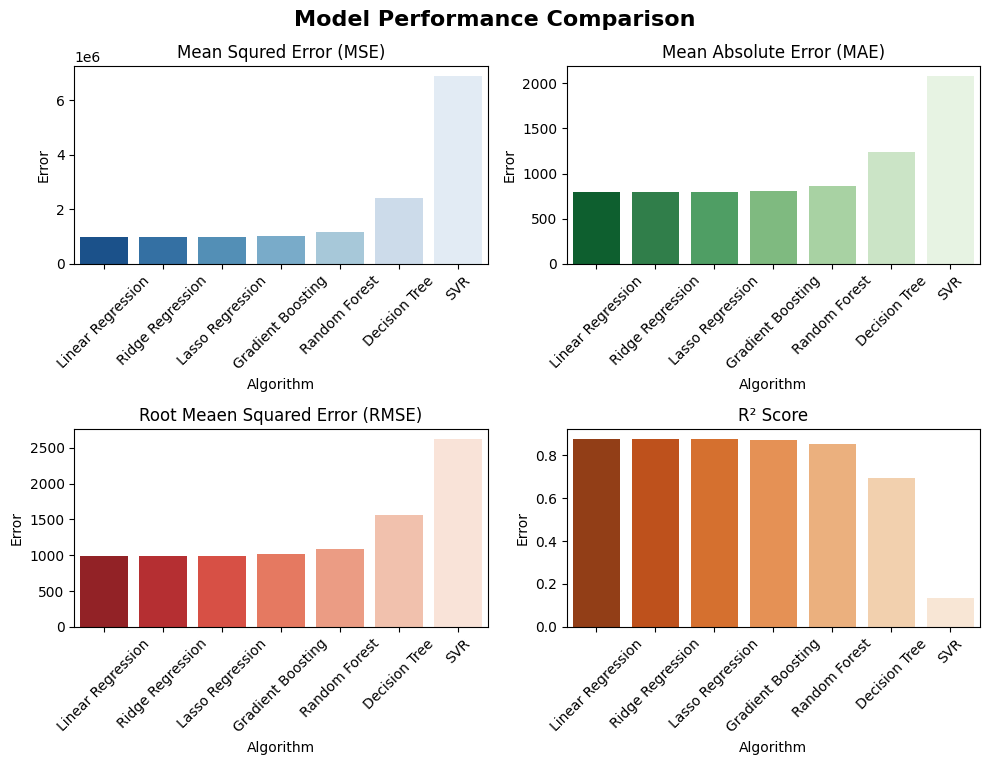

In [ ]:
# Visualization comparison of MAE, MSE, RMSE and R2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Model Performance Comparison", fontsize=16, fontweight="bold")

# MSE
sns.barplot(ax=axes[0,0], data=model_result, x='Algorithm', y='MSE', palette='Blues_r')
axes[0,0].set_title('Mean Squred Error (MSE)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].set_ylabel("Error")

# MAE
sns.barplot(ax=axes[0,1], data=model_result, x='Algorithm', y='MAE', palette='Greens_r')
axes[0,1].set_title('Mean Absolute Error (MAE)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_ylabel("Error")

# RMSE
sns.barplot(ax=axes[1,0], data=model_result, x='Algorithm', y='RMSE', palette='Reds_r')
axes[1,0].set_title('Root Meaen Squared Error (RMSE)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].set_ylabel("Error")

# R2
sns.barplot(ax=axes[1,1], data=model_result, x='Algorithm', y='R²', palette='Oranges_r')
axes[1,1].set_title('R² Score')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylabel("Error")

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

## Overfitting Check

In [ ]:
from sklearn.metrics import r2_score

# Prediction train and test
y_train_pred = best_model.predict(X_train_processed)
y_test_pred = best_model.predict(X_test_processed)

# Calculate R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 Train:", round(r2_train, 4))
print("R2 Test:", round(r2_test, 4))

# Compare the differences
gap = abs(r2_train - r2_test)
print("\nGAP between train and test:", round(gap, 4))

R2 Train: 0.8709
R2 Test: 0.8765

GAP Gap between train and test: 0.0056


## Model Selection

In [ ]:
# Choose the best model based on CV results
best_model = LinearRegression()
best_model.fit(X_train_processed, y_train)

# Prediction on test data
y_pred = best_model.predict(X_test_processed)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model terbaik:", type(best_model).__name__)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model terbaik: LinearRegression
Mean Squared Error (MSE): 982113.67
Mean Absolute Error (MAE): 791.00
Root Mean Squared Error (RMSE): 991.02
R² Score: 0.8765


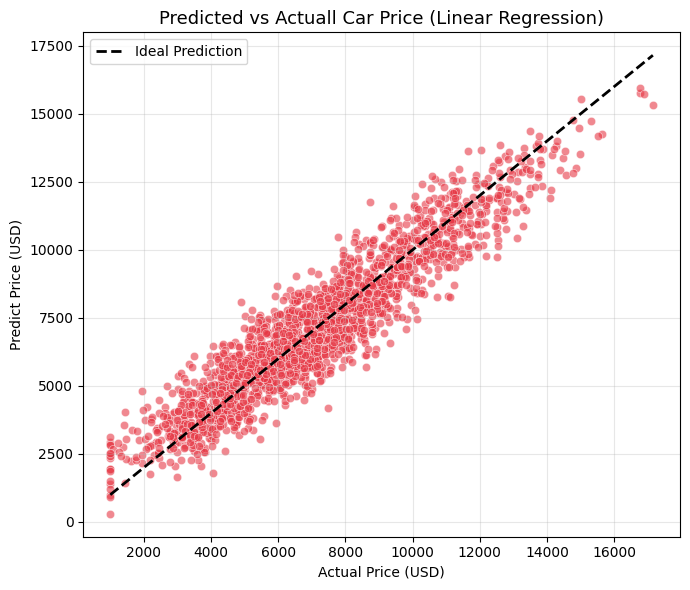

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, color="#E63946", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')

plt.title("Predicted vs Actuall Car Price (Linear Regression)", fontsize=13)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predict Price (USD)")
plt.legend(loc="upper left", frameon=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

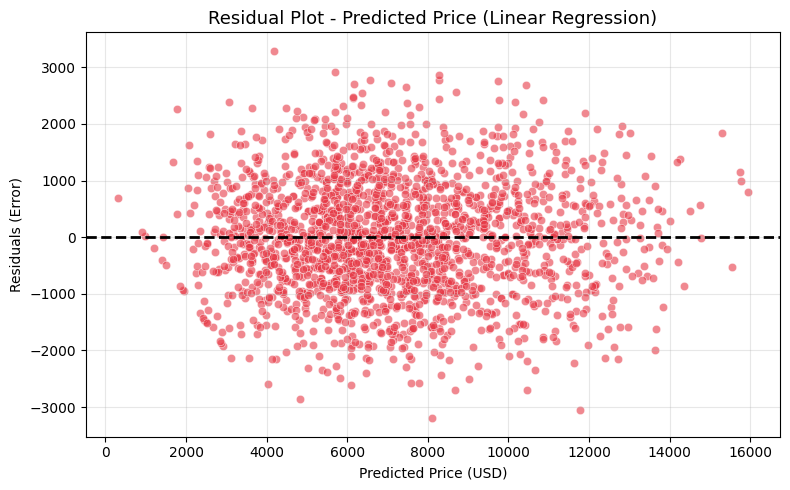

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, color="#E63946", alpha=0.6)
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.title("Residual Plot - Predicted Price (Linear Regression)", fontsize=13)
plt.xlabel("Predicted Price (USD)")
plt.ylabel("Residuals (Error)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Feature Importance

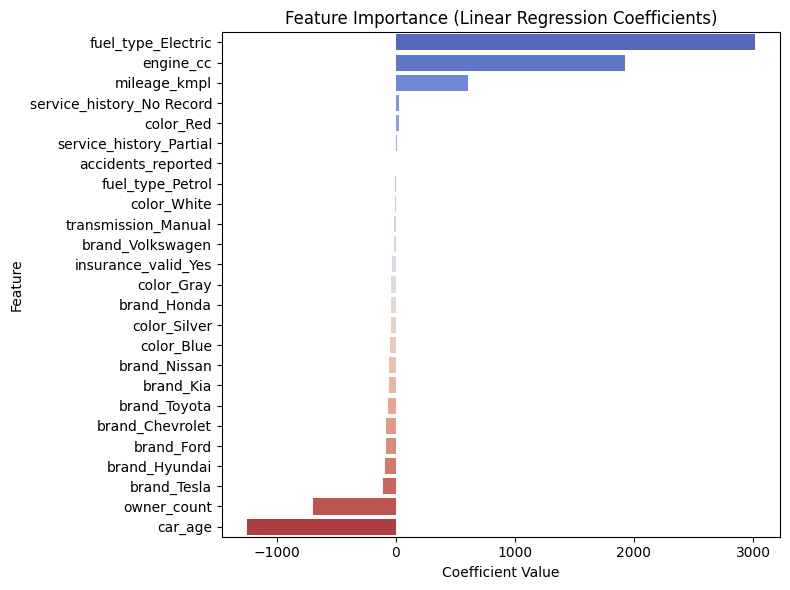

Use the SHAP or Permutation Importance method to see the influence of the features.


In [ ]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Encoded feature
encoded_cols = preprocessor.named_transformers_['categorical'].get_feature_names_out(cat_cols)

# Combine all numeric column names and encoding results
feature_names = np.concatenate([num_cols, encoded_cols])

# Create a DataFrame for the coefficients
if hasattr(model, "coef_"):
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    }).sort_values(by='Coefficient', ascending=False)

    # Visualization
    plt.figure(figsize=(8, 6))
    sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
    plt.title("Feature Importance (Linear Regression Coefficients)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

else:
    print("This model does not have a coef_ attribute (possibly a non-linear kernel).")
print("Use the SHAP or Permutation Importance method to see the influence of the features.")

1. Features with the greatest positive influence on car price (price_usd):
    * 🚗 fuel_type_Electric → Largest and most positive coefficient. ➜ Electric cars are significantly more expensive than non-electric cars.
    * ⚙️ engine_cc → The larger the engine capacity, the more expensive the car.

    * 🛣️ mileage_kmpl → Fuel efficiency (more fuel economy) also slightly increases the car's price.


2. Features with the greatest negative influence (lowering the price):

    * 📆 car_age → The older the car, the lower its resale value (depreciation).

    * 👥 owner_count → The more previous owners, the lower the car's price (as it is assumed to have been used more often).

    * 🛢️ fuel_type_Petrol → Gasoline cars tend to be cheaper than electric or hybrid cars.

3. Other category features (brand and color) have very little influence (close to zero).
    * This means that brand and color do not significantly influence price after controlling for technical factors such as age, engine, and fuel type.

Final Conclusion
  * Car prices are primarily influenced by fuel type (especially for electric cars), engine capacity, and age.

  * Aesthetic factors like color or brand still play a role, but they are much smaller than technical factors.

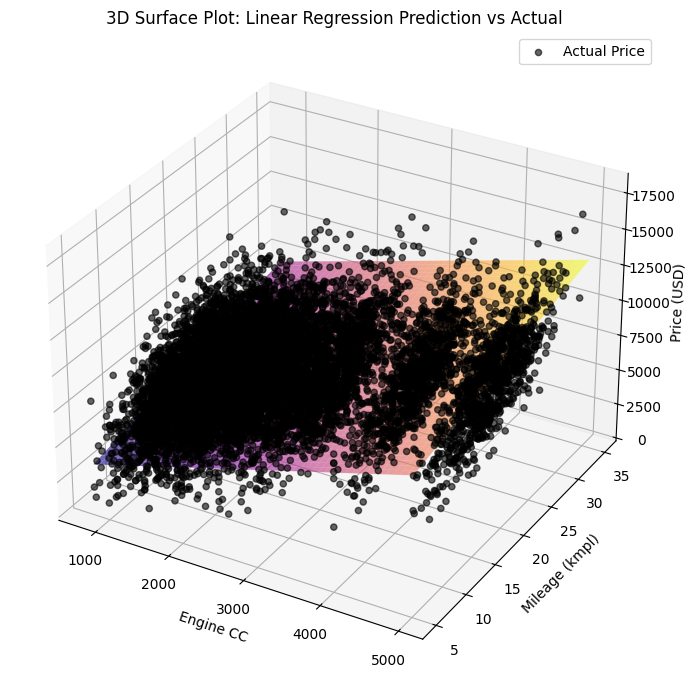

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# 1️⃣ Pilih dua fitur utama (contoh: engine_cc dan mileage_kmpl)
X_2d = car_data[['engine_cc', 'mileage_kmpl']]
y = car_data['price_usd']

# 2️⃣ Buat model linear regression sederhana dengan 2 fitur
model_2d = LinearRegression()
model_2d.fit(X_2d, y)

# 3️⃣ Buat grid untuk visualisasi permukaan prediksi
x_surf = np.linspace(X_2d['engine_cc'].min(), X_2d['engine_cc'].max(), 50)
y_surf = np.linspace(X_2d['mileage_kmpl'].min(), X_2d['mileage_kmpl'].max(), 50)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# 4️⃣ Prediksi harga berdasarkan grid (permukaan)
predicted_price = model_2d.predict(
    np.column_stack((x_surf.ravel(), y_surf.ravel()))
)
predicted_price = predicted_price.reshape(x_surf.shape)

# 5️⃣ Buat plot 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Plot permukaan prediksi (surface)
ax.plot_surface(x_surf, y_surf, predicted_price, cmap='plasma', alpha=0.6)

# Plot titik data aktual (scatter)
ax.scatter(
    X_2d['engine_cc'],
    X_2d['mileage_kmpl'],
    y,
    color='black',
    alpha=0.6,
    label='Actual Price'
)

# Label dan judul
ax.set_xlabel('Engine CC')
ax.set_ylabel('Mileage (kmpl)')
ax.set_zlabel('Price (USD)')
ax.set_title('3D Surface Plot: Linear Regression Prediction vs Actual')

# Legenda
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 1. Cek versi library
# 1. Cek versi library utama
import sklearn
import numpy
import pandas
import joblib
import seaborn
import matplotlib
import scipy
import plotly
import streamlit

print("VERSI LIBRARY SAAT TRAINING:")
print("scikit-learn:", sklearn.__version__)
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("scipy:", scipy.__version__)
print("joblib:", joblib.__version__)
print("seaborn:", seaborn.__version__)
print("plotly:", plotly.__version__)
print("streamlit:", streamlit.__version__)
print("matplotlib:", matplotlib.__version__)
print("-"*50)


VERSI LIBRARY SAAT TRAINING:
scikit-learn: 1.6.1
numpy: 2.0.2
pandas: 2.2.2
scipy: 1.16.3
joblib: 1.5.2
seaborn: 0.13.2
plotly: 5.24.1
streamlit: 1.51.0
matplotlib: 3.10.0
--------------------------------------------------


In [ ]:
from google.colab import drive

car_data.to_csv("/content/drive/MyDrive/DScience-Project/Car Price/cleaned_carprice.csv", index=False)

In [ ]:
import joblib

joblib.dump(model, "/content/drive/MyDrive/DScience-Project/Car Price/linear_model_car_price.pkl")
joblib.dump(preprocessor, "/content/drive/MyDrive/DScience-Project/Car Price/preprocessor.pkl")
print("Model dan Preprocessor berhasil disimpan!")

Model dan Preprocessor berhasil disimpan!
